# Pymaceuticals Inc.
---

### Analysis

- This analysis was to compare the effects different cancer drugs had on the tumors on mice in terms of the tumor volume and weight. The drug Capomulin was to be specifically highlighted to indentify if there was a positive correlation between the use of Capomulin in mice and the effects on the reduction of the tumor volume and weight. After merging the two data sets given and cleaning the data to remove a duplicate mouse. On the data visualizations Capomulin has a positive correalation on the use of the drug to the reduction of tumor volume and weight. The only other drug to compare was Ketapril.
 

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [72]:
print(mouse_metadata.shape)
mouse_metadata.head()

(249, 5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [73]:
print(study_results.shape)
study_results.head()

(1893, 4)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [74]:
print(df.shape)
df.info()

(1893, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


In [75]:
# Checking the number of mice.
df["Mouse ID"].nunique()

249

In [76]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df.groupby(["Mouse ID", "Timepoint"]).size().sort_values(ascending=False).head(10)

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
a203      0            1
q633      0            1
q610      20           1
          25           1
          30           1
dtype: int64

In [77]:
# Optional: Get all the data for the duplicate mouse ID. 
mask = df["Mouse ID"] == "g989"
df.loc[mask]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [78]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask = df["Mouse ID"] != "g989"
df2 = df.loc[mask].reset_index(drop=True)
df2.shape

(1880, 8)

In [79]:
# Checking the number of mice in the clean DataFrame.
df2["Mouse ID"].nunique()

248

## Summary Statistics

In [80]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_mean = df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tumor_median = df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_sem = df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
tumor_std = df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_var = df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()

data = {
    "Tumor Average": tumor_mean,
    "Tumor Median": tumor_median,
    "Tumor SEM": tumor_sem,
    "Tumor STD": tumor_std,
    "Tumor Var": tumor_var
}

leaderboard = pd.DataFrame(data).reset_index()
leaderboard

,Drug Regimen,Tumor Average,Tumor Median,Tumor SEM,Tumor STD,Tumor Var
0,Capomulin,40.675741,41.557809,0.329346,4.994774,24.947764
1,Ceftamin,52.591172,51.776157,0.469821,6.268188,39.290177
2,Infubinol,52.884795,51.820584,0.492236,6.567243,43.128684
3,Ketapril,55.235638,53.698743,0.603860,8.279709,68.553577
4,Naftisol,54.331565,52.509285,0.596466,8.134708,66.173479
5,Placebo,54.033581,52.288934,0.581331,7.821003,61.168083
6,Propriva,52.320930,50.446266,0.544332,6.622085,43.852013
7,Ramicane,40.216745,40.673236,0.320955,4.846308,23.486704
8,Stelasyn,54.233149,52.431737,0.573111,7.710419,59.450562
9,Zoniferol,53.236507,51.818479,0.516398,6.966589,48.533355


In [81]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
cols_agg = {
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
}
leaderboard2 = df2.groupby(["Drug Regimen"]).agg(cols_agg).reset_index()
leaderboard2

Drug Regimen Tumor Volume (mm3)                                          
                             mean     median        var       std       sem
0    Capomulin          40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin          52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol          52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril          55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol          54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo          54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva          52.320930  50.446266  43.852013  6.622085  0.544332
7     Ramicane          40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn          54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol          53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

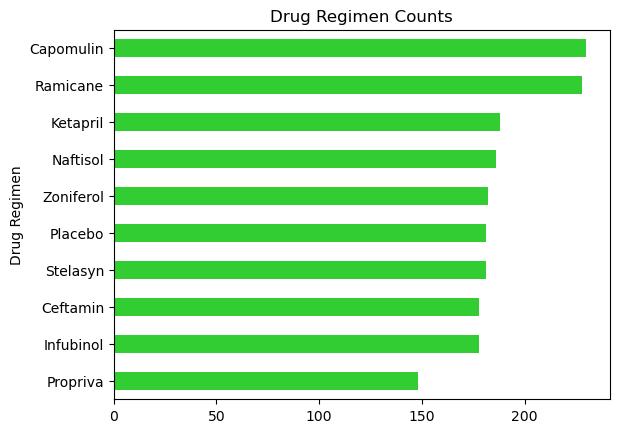

In [86]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
df2["Drug Regimen"].value_counts().sort_values().plot(kind="barh", title="Drug Regimen Counts", color="limegreen")
plt.show()

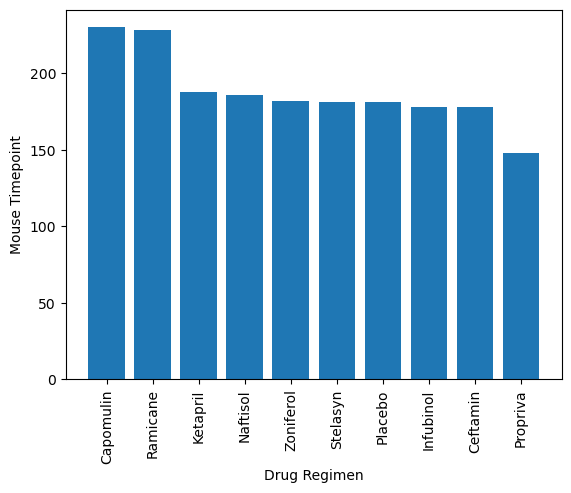

In [132]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
data = df2["Drug Regimen"].value_counts()
x = data.index.values
y = data.values


# make the plot
# df2["Drug Regimen"].value_counts().sort_values().plot(kind="barh", title="Drug Regimen Counts", color="limegreen")
plt.bar(x, y)

plt.xlabel("Drug Regimen")
plt.ylabel("Mouse Timepoint")
plt.xticks(rotation=90)
plt.show()


<Axes: ylabel='count'>

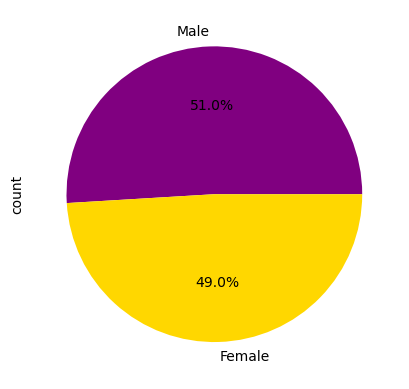

In [102]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
data = df2["Sex"].value_counts()
colors = ['purple', 'gold']
data.plot(kind = "pie", autopct='%1.1f%%', colors=colors)

Text(0, 0.5, 'Sex')

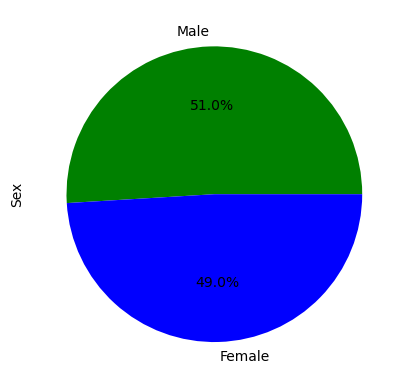

In [112]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
data = df2["Sex"].value_counts()
colors = ['green', 'blue']
plt.pie(data, autopct='%1.1f%%', labels=data.index.values, colors=colors)
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [113]:
import seaborn as sns

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ketapril'),
  Text(2, 0, 'Naftisol'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Stelasyn'),
  Text(5, 0, 'Ramicane'),
  Text(6, 0, 'Zoniferol'),
  Text(7, 0, 'Propriva'),
  Text(8, 0, 'Placebo'),
  Text(9, 0, 'Ceftamin')])

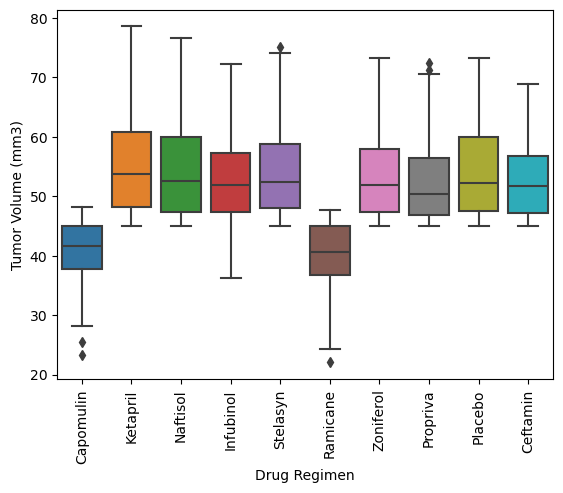

In [115]:
sns.boxplot(data=df2, x="Drug Regimen", y="Tumor Volume (mm3)")
plt.xticks(rotation=90)

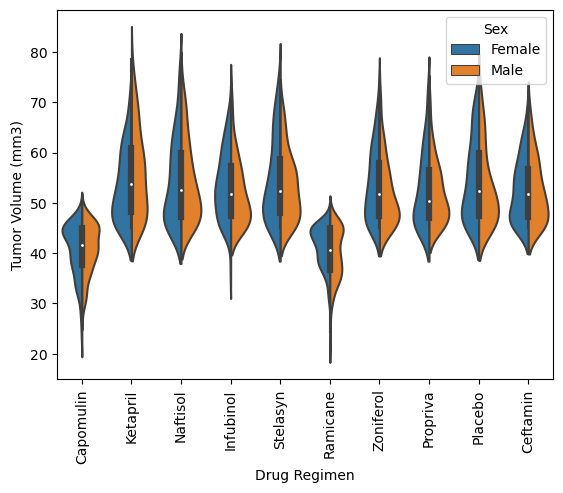

In [116]:
sns.violinplot(data=df2, x="Drug Regimen", y="Tumor Volume (mm3)", hue="Sex", split=True)
plt.xticks(rotation=90)
plt.show()

In [117]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [118]:
df3 = df2.groupby("Mouse ID").Timepoint.max().reset_index()
sub = df2.loc[:,["Mouse ID", "Timepoint", "Drug Regimen", "Tumor Volume (mm3)","Sex"]] # subsetting columns

df3 = pd.merge(df3, sub, on=["Mouse ID", "Timepoint"])

mask = df3["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
df3 = df3.loc[mask].reset_index(drop=True) # dropped rows

df3

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3),Sex
0,a203,45,Infubinol,67.973419,Female
1,a251,45,Infubinol,65.525743,Female
2,a275,45,Ceftamin,62.999356,Female
3,a411,45,Ramicane,38.407618,Male
4,a444,45,Ramicane,43.047543,Female
...,...,...,...,...,...
95,y769,45,Ceftamin,68.594745,Female
96,y793,45,Capomulin,31.896238,Male
97,y865,45,Ceftamin,64.729837,Male
98,z578,45,Ramicane,30.638696,Male


In [119]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


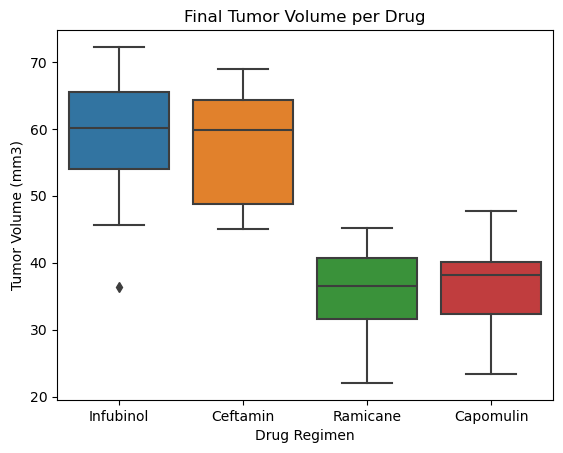

In [120]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
sns.boxplot(data=df3, x="Drug Regimen", y="Tumor Volume (mm3)")
plt.title("Final Tumor Volume per Drug")
plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

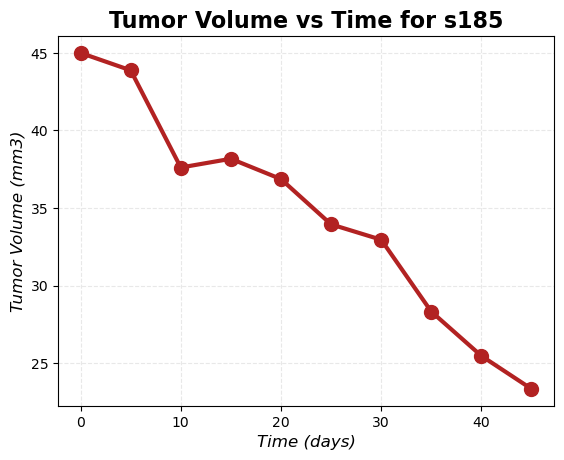

In [121]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
df2.loc[df2["Drug Regimen"] == "Capomulin"]

mouse = "s185"

data = df2.loc[df2["Mouse ID"] == mouse]

# Step 1: Obtain data
# x axis, 
time = data["Timepoint"]
y = data["Tumor Volume (mm3)"]

# Step 3:
plt.plot(time, y, color="firebrick", linewidth=3, marker="o", markersize=10)

# Step 4:
plt.xlabel("Time (days)", fontsize=12, fontstyle="italic")
plt.ylabel("Tumor Volume (mm3)", fontsize=12, fontstyle="italic")
plt.title(f"Tumor Volume vs Time for {mouse}", fontsize=16, fontweight="bold")

plt.grid(color="lightgrey", linestyle="--", alpha=0.5)

# Step 5: Display graph
plt.show

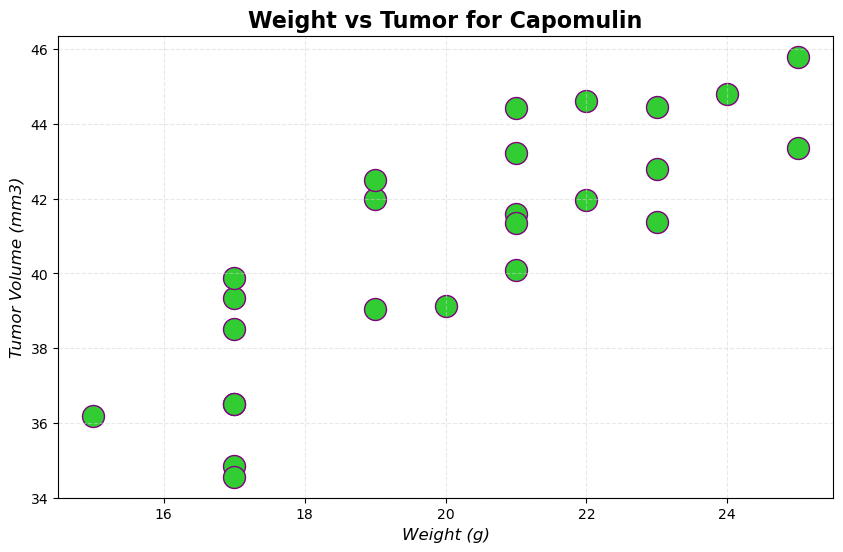

In [122]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
data = df2.loc[df2["Drug Regimen"] == "Capomulin"]

df4 = data.groupby("Mouse ID").agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"}).reset_index()

x = df4["Weight (g)"]
y = df4["Tumor Volume (mm3)"]

plt.figure(figsize=(10, 6))

plt.scatter(x, y, facecolor="limegreen", edgecolor="purple", s=250)

# Customizations
plt.xlabel("Weight (g)", fontsize=12, fontstyle="italic")
plt.ylabel("Tumor Volume (mm3)", fontsize=12, fontstyle="italic")
plt.title("Weight vs Tumor for Capomulin", fontweight="bold", fontsize=16)

# plt.xlim(10, 27)
# plt.ylim(0, 250)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

plt.show()

## Correlation and Regression

In [123]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



In [124]:
corrs = df4.corr(numeric_only = True)

corrs

,Weight (g),Tumor Volume (mm3)
Weight (g),1.000000,0.841936
Tumor Volume (mm3),0.841936,1.000000


In [125]:
.84 ** 2

0.7055999999999999

The r-squared is: 0.7088568047708723


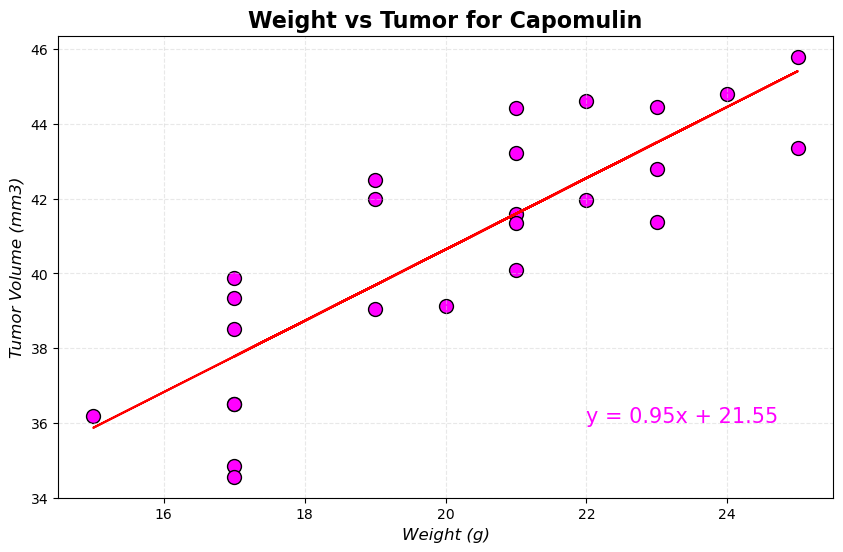

In [131]:
# Using Linregress
x_values = df4["Weight (g)"]
y_values = df4["Tumor Volume (mm3)"]

# make the line of best fit
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Make canvas
plt.figure(figsize=(10, 6))

# Make the basic plot
plt.scatter(x_values, y_values, facecolor="magenta", edgecolor="black", s=100)
plt.plot(x_values, regress_values, "r-") 

# Customizations
plt.xlabel("Weight (g)", fontsize=12, fontstyle="italic")
plt.ylabel("Tumor Volume (mm3)", fontsize=12, fontstyle="italic")
plt.title("Weight vs Tumor for Capomulin", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

plt.annotate(line_eq,(22, 36),fontsize=15,color="magenta")

print(f"The r-squared is: {rvalue**2}")
plt.show()





